In [327]:
import pandas as pd
import matplotlib.pyplot as plt

In [328]:
test_data = pd.read_csv("covid-19-tests-country.csv")

### 1. Percentage of total test per country

In [329]:
test_data = test_data.dropna()
test_count = test_data["Total COVID-19 tests"].sum()
test_data["Test Percentage"] = round((test_data["Total COVID-19 tests"] *100 / test_count),2)
test_data = test_data.sort_values(by='Test Percentage', ascending=False)
del test_data["Code"]
del test_data["Year"]

In [330]:
x_label = [ str(i) + '%' for i in range(20) if i % 2 == 0]
x_label 

['0%', '2%', '4%', '6%', '8%', '10%', '12%', '14%', '16%', '18%']

/Users/Jiyumeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[Text(0, 0, '0%'),
 Text(0, 0, '2%'),
 Text(0, 0, '4%'),
 Text(0, 0, '6%'),
 Text(0, 0, '8%'),
 Text(0, 0, '10%'),
 Text(0, 0, '12%'),
 Text(0, 0, '14%'),
 Text(0, 0, '16%'),
 Text(0, 0, '18%')]

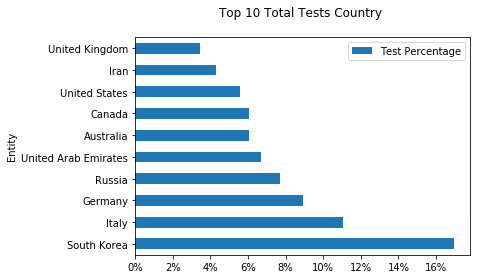

In [331]:
test_data_chart = test_data.iloc[:10]
test_data_chart["x_label"] = test_data_chart["Test Percentage"].map('{:,.2f}%'.format)
test_data_chart.reset_index(drop=True,inplace = True)
test_data_chart.set_index(["x_label"],inplace=True)
ax = test_data_chart.plot.barh("Entity","Test Percentage", title = "Top 10 Total Tests Country \n")
ax.set_xticklabels(x_label)

In [333]:
new_test_data = test_data.copy()

In [334]:
new_test_data['Test Percentage']  = new_test_data['Test Percentage'].map('{:,.2f}%'.format)
new_test_data.reset_index(drop=True,inplace = True)
new_test_data.head(10)

,Entity,Total COVID-19 tests,Test Percentage
0,South Korea,316664,16.95%
1,Italy,206886,11.07%
2,Germany,167000,8.94%
3,Russia,143519,7.68%
4,United Arab Emirates,125000,6.69%
5,Australia,113615,6.08%
6,Canada,113121,6.05%
7,United States,103945,5.56%
8,Iran,80000,4.28%
9,United Kingdom,64621,3.46%


### 2. Percentage of a thousand people been tested

In [341]:
ppl_data = pd.read_csv("UN-population-projection-medium-variant.csv")

In [342]:
ppl20 = ppl_data[ppl_data["Year"] == 2020]
ppl20 = ppl20.drop(['Estimates, 1950 - 2015: Total population by broad age group, both sexes combined (thousands) - Total'], axis=1)

In [338]:
chart_x_label = [ str(i) + '%' for i in range(30) if i % 5 == 0]
chart_x_label 

['0%', '5%', '10%', '15%', '20%', '25%']

/Users/Jiyumeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[Text(0, 0, '0%'),
 Text(0, 0, '5%'),
 Text(0, 0, '10%'),
 Text(0, 0, '15%'),
 Text(0, 0, '20%'),
 Text(0, 0, '25%')]

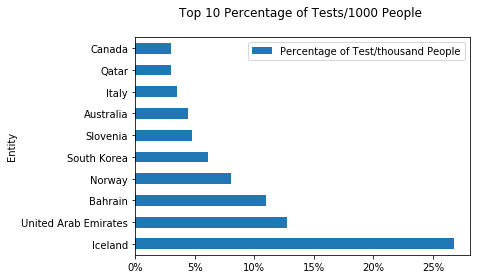

In [350]:
test_df_chart = test_df.iloc[:10]
test_df_chart["chart_x_label"] = test_df_chart["Percentage of Test/thousand People"].map('{:,.2f}%'.format)
test_df_chart.reset_index(drop=True,inplace = True)
test_df_chart.set_index(["chart_x_label"],inplace=True)
ax = test_df_chart.plot.barh("Entity","Percentage of Test/thousand People",title = "Top 10 Percentage of Tests/1000 People \n")
ax.set_xticklabels(chart_x_label)

In [ ]:
new_test_df_chart = test_df_chart.copy()

In [ ]:
new_test_df_chart['Test Percentage']  = test_df_chart['Percentage of Test/thousand People'].map('{:,.2f}%'.format)
new_test_df_chart.reset_index(drop=True,inplace = True)
del new_test_df_chart["Percentage of Test/thousand People"]
new_test_df_chart.head(10)